# MLOps. Практическое задание №5

## Импорты

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse_score
from sklearn.metrics import r2_score

## Вспомогательные функции

In [2]:
def create_data(a=1, b=0, d_amp=2):
    x = np.linspace(0, 100, 101)
    d = np.random.random(len(x))*d_amp*2 - d_amp
    y = a * x + b + d

    return pd.DataFrame({'feature': x, 'target': y})

In [3]:
def visualise_data(data, name):
    plt.title(name)
    plt.scatter(data['feature'], data['target'])

In [4]:
def save_data(data, name):
    data.to_csv(f'{name}.csv')

In [5]:
def test_model(model, data, name):
    predicted = model.predict(data[['feature']])

    mse = mse_score(data['target'], predicted)
    r2 = r2_score(data['target'], predicted)

    print(f'Name: {name}, MSE: {mse}, R2: {r2}')

## Работа с данными

### Создание, визуализация и сохранение "качественных" данных

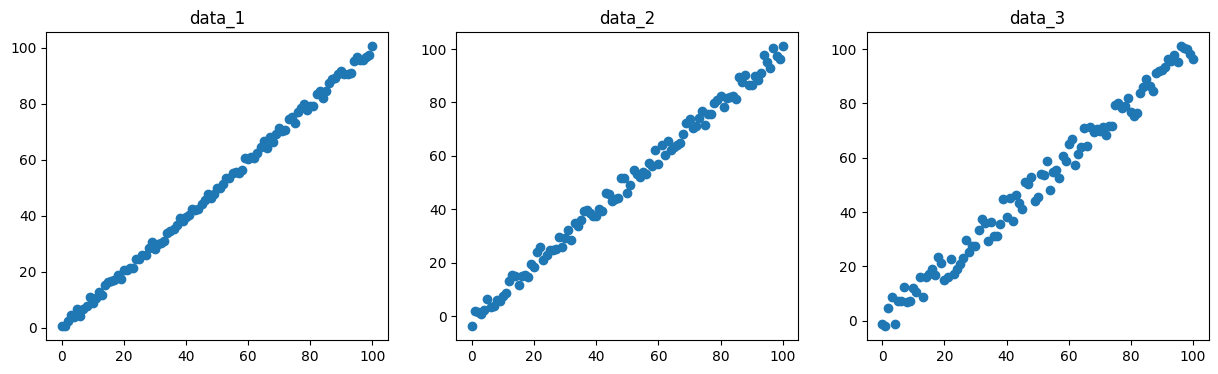

In [6]:
data_1 = create_data(d_amp=2)
data_2 = create_data(d_amp=4)
data_3 = create_data(d_amp=6)

data_list = [data_1, data_2, data_3]

plt.subplots(1, 3, figsize=(15,4))
for index, data in enumerate(data_list, start=1):
    plt.subplot(1, 3, index)
    name = f'data_{index}'
    visualise_data(data, name)
    save_data(data, name)

### Создание, визуализация и сохранение "испорченных" данных

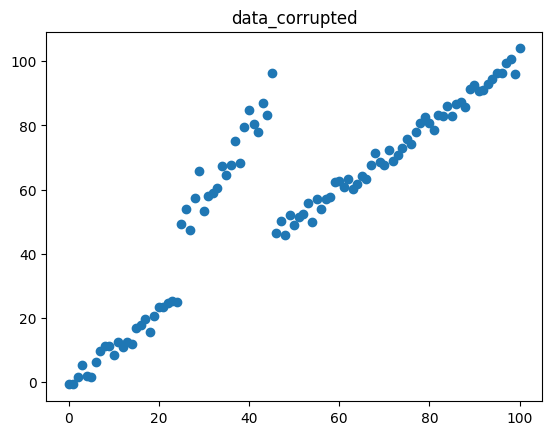

In [7]:
data_corrupted = create_data(d_amp=4)
data_corrupted.loc[25:45, 'target'] *= 2

visualise_data(data_corrupted, 'data_corrupted')
save_data(data_corrupted, 'data_corrupted')

## Работа с моделью

### Создание модели

In [8]:
model = Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())])

model.fit(data_1[['feature']], data_1['target'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

### Тестирование модели

In [9]:
for index, data in enumerate(data_list, start=1):
    name = f'data_{index}'
    test_model(model, data, name)

test_model(model, data_corrupted, 'data_corrupted')

Name: data_1, MSE: 1.3789023111436087, R2: 0.9983870377676913
Name: data_2, MSE: 5.132489099962835, R2: 0.99409762809778
Name: data_3, MSE: 12.64512577975347, R2: 0.9857465616910146
Name: data_corrupted, MSE: 250.95409228058662, R2: 0.7052491532140347


### Сохранение модели

In [10]:
joblib.dump(model, 'model.joblib');

## Работа с тестами

### Создание тестового файла

In [11]:
%%writefile test_model.py
import joblib
import pandas as pd
from sklearn.metrics import mean_squared_error as mse_score
from sklearn.metrics import r2_score

model = joblib.load('model.joblib')


def load_data(name):
    return pd.read_csv(f'{name}.csv')


def compute_metrics(data):
    predicted = model.predict(data[['feature']])

    mse = mse_score(data['target'], predicted)
    r2 = r2_score(data['target'], predicted)

    return mse, r2


def execute_test(name, is_data_correct=True):
    mse, r2 = compute_metrics(load_data(name))

    data_correct_check = mse < 20 and r2 > 0.95

    assert is_data_correct == data_correct_check


def test_data_1():
    execute_test('data_1')


def test_data_2():
    execute_test('data_2')


def test_data_3():
    execute_test('data_3')


def test_data_corrupted():
    execute_test('data_corrupted', is_data_correct=False)

Writing test_model.py


### Запуск тестового файла

In [12]:
!pytest

============================= test session starts ==============================
platform darwin -- Python 3.11.7, pytest-8.2.0, pluggy-1.5.0
rootdir: /Users/myevilpumpkin/MLOps/lab5
collected 4 items                                                              

test_model.py ....                                                       [100%]

============================== 4 passed in 0.78s ===============================
